<a href="https://colab.research.google.com/github/noyon57/Newcolab-file/blob/main/WithoutDuplicete(pregnancy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [346]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


import xgboost
from xgboost import XGBClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [347]:
dataset=pd.read_csv('Maternal Health Risk Data Set.csv')

In [348]:
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


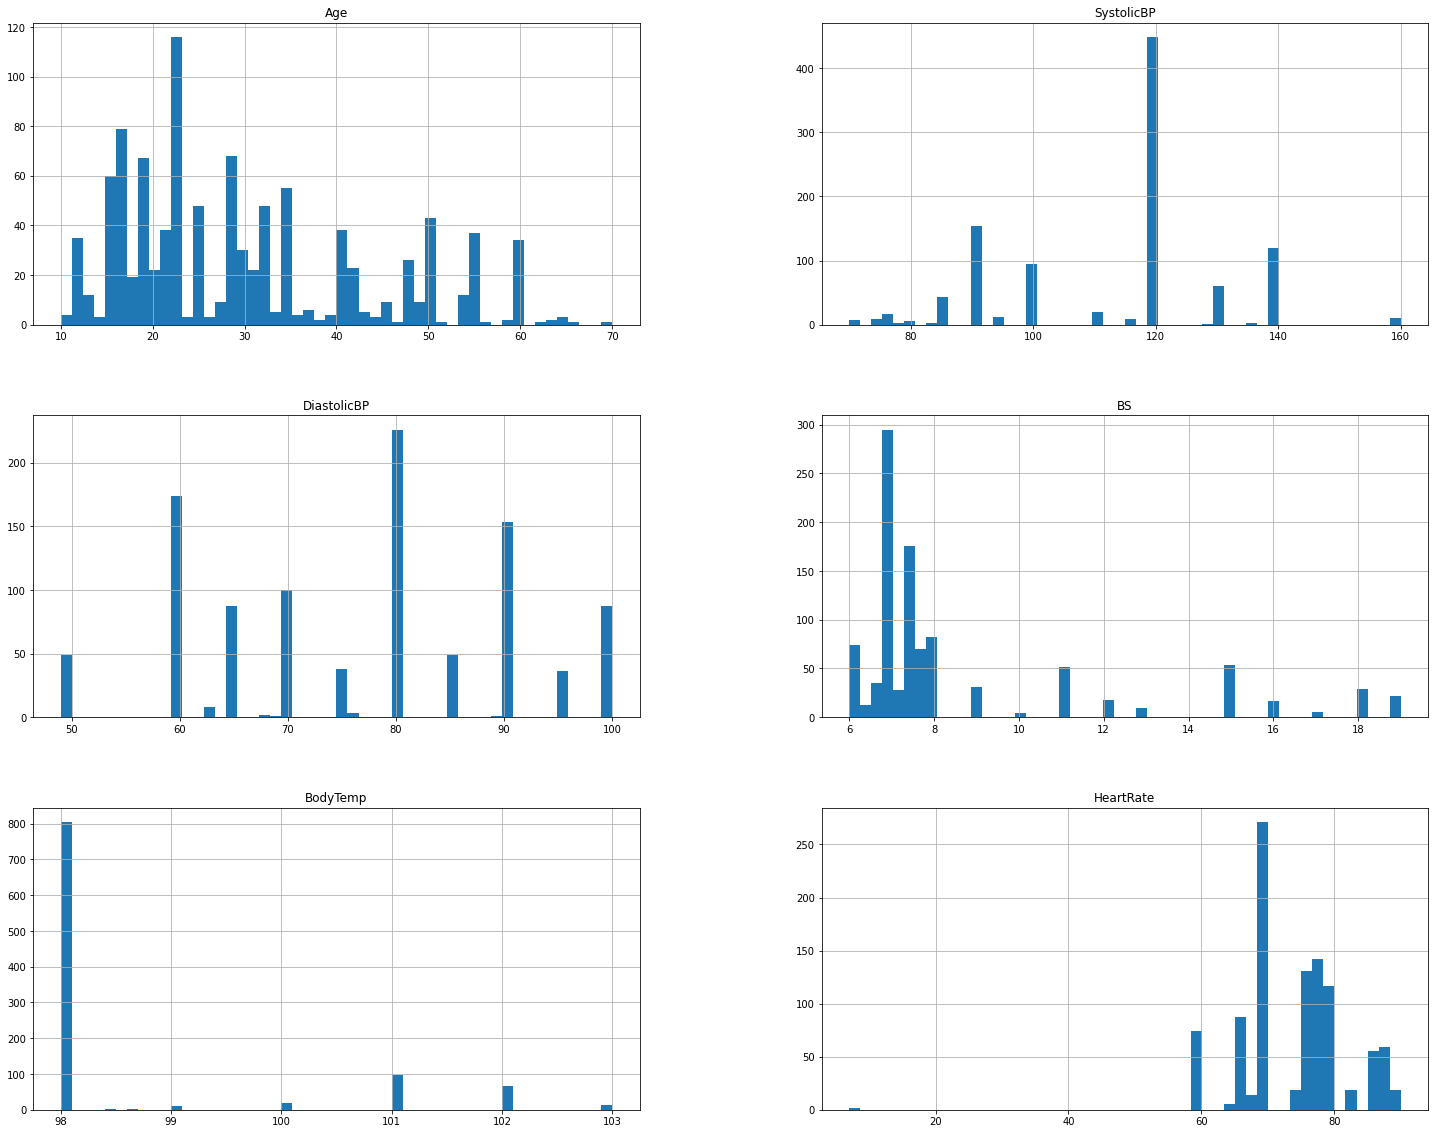

In [349]:
dataset.hist(bins=50, figsize=(25, 20))
plt.show()

Text(0, 0.5, '')

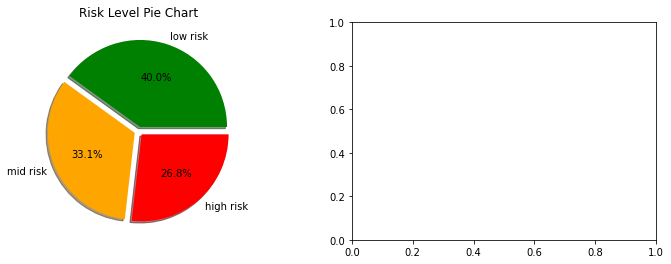

In [350]:
p_colors = ['green', 'orange', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

dataset["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')



In [351]:
dataset.RiskLevel = le.fit_transform(dataset.RiskLevel.values)


In [352]:
print(f"There are {dataset.duplicated().sum()} duplicates dataset")
dataset.loc[dataset.duplicated(keep=False)].sort_values(by=dataset.columns.to_list())

There are 562 duplicates dataset


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,2
849,10,100,50,6.0,99.0,70,2
552,12,90,60,7.5,102.0,60,1
940,12,90,60,7.5,102.0,60,1
543,12,90,60,7.5,102.0,66,1
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,2
772,60,120,85,15.0,98.0,60,2
818,60,120,85,15.0,98.0,60,2
114,63,140,90,15.0,98.0,90,0


In [353]:
#removing duplicate
dataset.drop_duplicates(keep='first', inplace=True)

In [354]:
print(f"There are {dataset.duplicated().sum()} duplicates dataset")
dataset.loc[dataset.duplicated(keep=False)].sort_values(by=dataset.columns.to_list())

There are 0 duplicates dataset


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


In [355]:
original_train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)

# To be sure we will create a copy for further processing
train_dataset = original_train_dataset.copy()

In [356]:
correlation_matrix = train_dataset.corr(method='pearson')

correlation_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.361179,0.341641,0.356774,-0.201934,0.078364,-0.125396
SystolicBP,0.361179,1.000000,0.787048,0.363275,-0.206589,0.013279,-0.165451
DiastolicBP,0.341641,0.787048,1.000000,0.323254,-0.217083,0.005480,-0.194749
BS,0.356774,0.363275,0.323254,1.000000,-0.066694,0.154322,-0.402713
BodyTemp,-0.201934,-0.206589,-0.217083,-0.066694,1.000000,0.087440,-0.074870
HeartRate,0.078364,0.013279,0.005480,0.154322,0.087440,1.000000,-0.114864
RiskLevel,-0.125396,-0.165451,-0.194749,-0.402713,-0.074870,-0.114864,1.000000


In [357]:
correlation_matrix["RiskLevel"].sort_values()


BS            -0.402713
DiastolicBP   -0.194749
SystolicBP    -0.165451
Age           -0.125396
HeartRate     -0.114864
BodyTemp      -0.074870
RiskLevel      1.000000
Name: RiskLevel, dtype: float64

In [358]:
#handeling missing data
names = ['Age', 'SystolicBP', 'DiastolicBP', 'BodyTemp', 'HeartRate', 'BS']

for name in names:
    train_dataset[name].replace(0, np.nan, inplace=True)

In [359]:
train_dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
328,35,90,70,6.90,98.0,70,1
285,13,90,65,9.00,101.0,80,0
10,23,90,60,7.01,98.0,76,1
12,25,110,89,7.01,98.0,77,1
134,40,120,95,11.00,98.0,80,0
...,...,...,...,...,...,...,...
199,17,85,60,9.00,102.0,86,0
145,14,90,65,7.00,101.0,70,0
102,48,140,90,15.00,98.0,90,0
127,55,140,95,19.00,98.0,77,0


In [360]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_dataset = train_dataset.copy()
column_names = temp1_dataset.columns.tolist()

# transform all attributes
temp1_dataset[column_names] = mm_scaler.fit_transform(temp1_dataset[column_names])

temp1_dataset.sort_index(inplace=True)
temp1_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,0.250000,0.666667,0.607843,0.692308,0.0,0.951807,0.0
1,0.416667,0.777778,0.803922,0.538462,0.0,0.759036,0.0
3,0.333333,0.777778,0.705882,0.076923,0.0,0.759036,0.0
4,0.416667,0.555556,0.215686,0.007692,0.0,0.831325,0.5
6,0.216667,0.666667,0.411765,0.077692,0.0,0.855422,1.0


In [361]:

standard_scaler = StandardScaler()

temp2_dataset = train_dataset.copy()

# transform all attributes
temp2_dataset[column_names] = mm_scaler.fit_transform(temp2_dataset[column_names])
temp2_dataset.sort_index(inplace=True)
temp2_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,0.250000,0.666667,0.607843,0.692308,0.0,0.951807,0.0
1,0.416667,0.777778,0.803922,0.538462,0.0,0.759036,0.0
3,0.333333,0.777778,0.705882,0.076923,0.0,0.759036,0.0
4,0.416667,0.555556,0.215686,0.007692,0.0,0.831325,0.5
6,0.216667,0.666667,0.411765,0.077692,0.0,0.855422,1.0


Removing Irrelevant Features
After conducting several analyzes of the predictor variables, we conclude that the HeartRate variable is less helpful in determining the health risks of pregnant women. So, it's safe to remove that variable.

In [362]:
dataset_proc = dataset.drop(dataset.index[dataset.HeartRate == 7])


In [363]:
dataset_proc = dataset_proc.drop(["HeartRate"], axis=1)

In [364]:
# separating the data and labels
X = dataset.drop(columns = 'RiskLevel', axis=1)
y = dataset['RiskLevel']

In [365]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [366]:
print(X.shape, X_train.shape, X_test.shape)

(452, 6) (361, 6) (91, 6)


In [367]:
model1=RandomForestClassifier(max_depth=2, random_state=0)
model2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model3 = DecisionTreeClassifier(max_depth = 2,random_state=0)







In [368]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=0)

In [369]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)


In [370]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [371]:
#10-fold cross-validation 
kfold = model_selection.KFold(n_splits=10)
result1 = model_selection.cross_val_score(model1, X_train, y_train, cv=kfold)
result2 = model_selection.cross_val_score(model2, X_train, y_train, cv=kfold)
result3 = model_selection.cross_val_score(model3, X_train, y_train, cv=kfold)


In [372]:
print('Accuracy of rf = ',result1.mean())
print('Accuracy of xgbboost = ',result2.mean())
print('Accuracy of dt = ',result3.mean())



Accuracy of rf =  0.7146396396396396
Accuracy of xgbboost =  0.6924174174174175
Accuracy of dt =  0.7063063063063062


MAKING A HRBRID ALGORITHM USING  RF+XGB+DT

In [373]:
#Hybrid Ensemble Learning Model
estimators = []


In [374]:
#Defining 5 Decision Tree Classifiers
model16 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model16))
model17 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model17))
model18 = DecisionTreeClassifier(max_depth = 5)
estimators.append(('cart3', model18))
model19 = DecisionTreeClassifier(max_depth = 2)
estimators.append(('cart4', model19))
model20 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart5', model20))


In [375]:
#Defining 5 randomforest Tree Classifiers
model16 = RandomForestClassifier(max_depth=3, random_state=0,n_estimators=100)
estimators.append(('RandomForest1', model16))
model17 = RandomForestClassifier(max_depth=2, random_state=1,n_estimators=50)
estimators.append(('RandomForest2', model17))
model18 = RandomForestClassifier(max_depth=2, random_state=2,n_estimators=30)
estimators.append(('RandomForest3', model18))
model19 =RandomForestClassifier(max_depth=3, random_state=100,n_estimators=10)
estimators.append(('RandomForest4', model19))
model20 = RandomForestClassifier(max_depth=1, random_state=96,n_estimators=20)
estimators.append(('RandomForest5', model20))


In [376]:
#Defining 5 randomforest Tree Classifiers
model16 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
estimators.append(('XGB1', model16))
model17 = XGBClassifier(use_label_encoder=False)
estimators.append(('XGB2', model17))
model18 = XGBClassifier(use_label_encoder=True, eval_metric='mlogloss')
estimators.append(('XGB3', model18))
model19 =XGBClassifier( eval_metric='mlogloss')
estimators.append(('XGB4', model19))
model20 = XGBClassifier()
estimators.append(('XGB5', model20))

In [377]:
# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [378]:
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)

In [379]:
print(cm_HybridEnsembler)

[[14  6  3]
 [ 1 46  0]
 [ 2 13  6]]


In [380]:
#Cross-Validation
kfold = model_selection.KFold(n_splits=4)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

0.7286019536019537
